<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\leosh\AppData\Local\Temp\ipykernel_18400\2323665664.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['test_num'] = df['file'].str.extract('test(\d+)').astype(int)


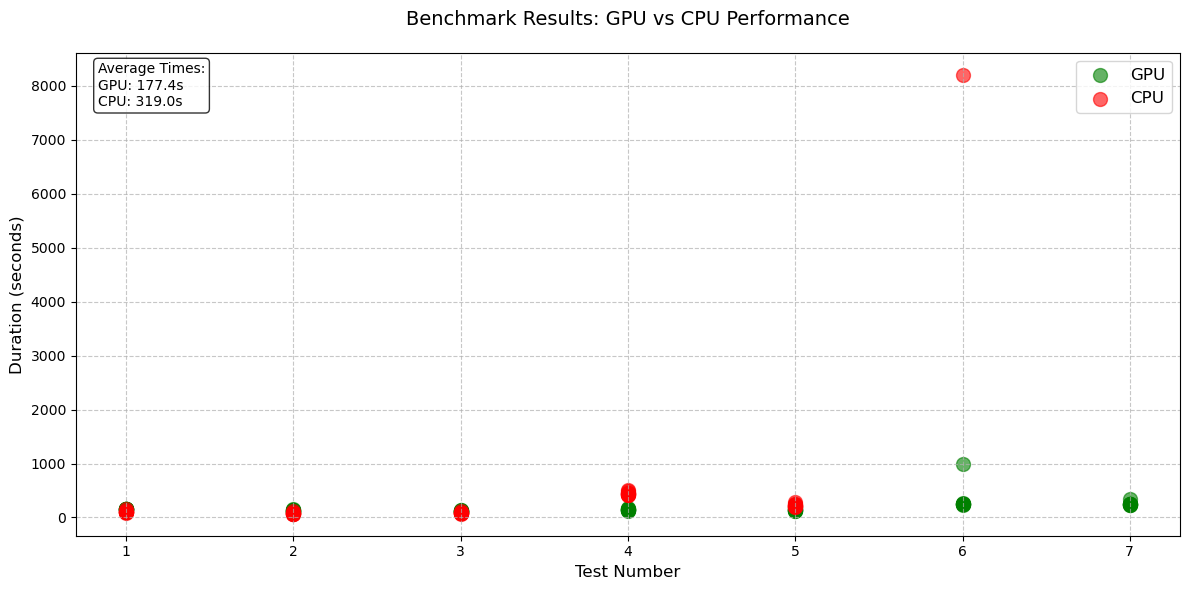

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the benchmark data
df = pd.read_csv('benchmark.csv')

# Extract test numbers from filenames
df['test_num'] = df['file'].str.extract('test(\d+)').astype(int)

# Create the plot
plt.figure(figsize=(12, 6))

# Plot GPU times in red
gpu_data = df[df['mode'] == 'GPU']
plt.scatter(gpu_data['test_num'], gpu_data['duration_seconds'], 
            color='green', label='GPU', s=100, alpha=0.6)

# Plot CPU times in green
cpu_data = df[df['mode'] == 'CPU']
plt.scatter(cpu_data['test_num'], cpu_data['duration_seconds'], 
            color='red', label='CPU', s=100, alpha=0.6)

# Customize the plot
plt.title('Benchmark Results: GPU vs CPU Performance', fontsize=14, pad=20)
plt.xlabel('Test Number', fontsize=12)
plt.ylabel('Duration (seconds)', fontsize=12)
plt.xticks(range(1, 8))  # Show all test numbers
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Add a text box with summary statistics
gpu_avg = gpu_data['duration_seconds'].mean()
cpu_avg = cpu_data['duration_seconds'].mean()
stats_text = f'Average Times:\nGPU: {gpu_avg:.1f}s\nCPU: {cpu_avg:.1f}s'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\leosh\AppData\Local\Temp\ipykernel_18400\696078978.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['test_num'] = df['file'].str.extract('test(\d+)').astype(int)


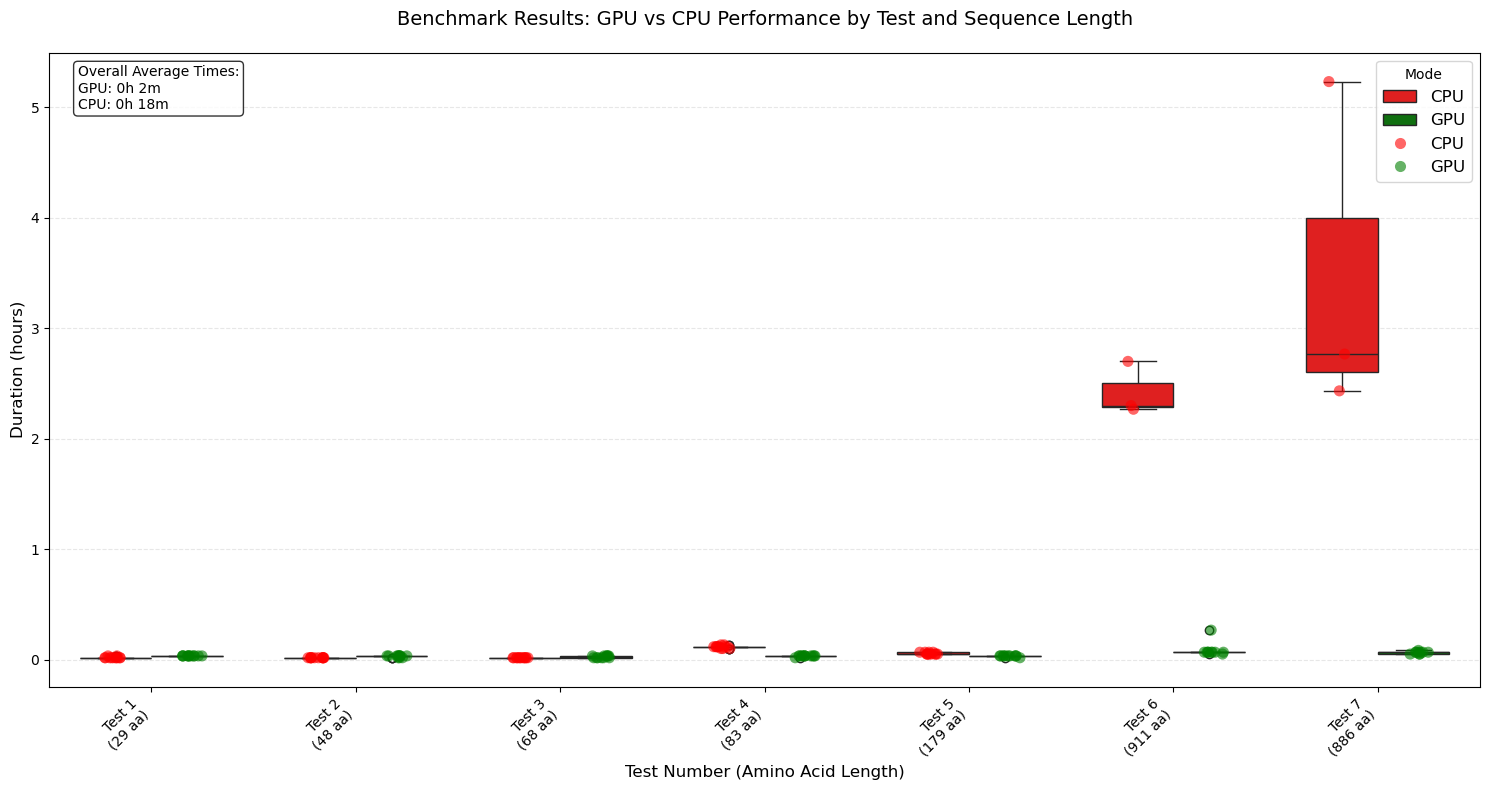

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the benchmark data
df = pd.read_csv('benchmark.csv')

# Extract test numbers and create a combined label with amino acid length
df['test_num'] = df['file'].str.extract('test(\d+)').astype(int)
df['test_label'] = df.apply(lambda x: f"Test {x['test_num']}\n({x['aa_length']} aa)", axis=1)

# Convert seconds to hours and minutes
def format_time(seconds):
    hours = seconds // 3600
    minutes = (seconds % 3600) // 60
    return hours + minutes/60  # Return as decimal hours

df['duration_hours'] = df['duration_seconds'].apply(format_time)

# Create the plot
plt.figure(figsize=(15, 8))

# Create boxplot
sns.boxplot(data=df, x='test_label', y='duration_hours', hue='mode',
            palette={'GPU': 'green', 'CPU': 'red'}, width=0.7)

# Add individual points for better visibility of actual data points
sns.stripplot(data=df, x='test_label', y='duration_hours', hue='mode',
              palette={'GPU': 'green', 'CPU': 'red'}, dodge=True, 
              size=8, alpha=0.6, jitter=True)

# Customize the plot
plt.title('Benchmark Results: GPU vs CPU Performance by Test and Sequence Length', 
         fontsize=14, pad=20)
plt.xlabel('Test Number (Amino Acid Length)', fontsize=12)
plt.ylabel('Duration (hours)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.legend(title='Mode', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a text box with summary statistics
def format_time_str(hours):
    total_hours = int(hours)
    minutes = int((hours - total_hours) * 60)
    return f"{total_hours}h {minutes}m"

gpu_avg = df[df['mode'] == 'GPU']['duration_hours'].mean()
cpu_avg = df[df['mode'] == 'CPU']['duration_hours'].mean()
stats_text = f'Overall Average Times:\nGPU: {format_time_str(gpu_avg)}\nCPU: {format_time_str(cpu_avg)}'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

<>:9: SyntaxWarning: invalid escape sequence '\d'
<>:9: SyntaxWarning: invalid escape sequence '\d'
C:\Users\leosh\AppData\Local\Temp\ipykernel_31348\456886550.py:9: SyntaxWarning: invalid escape sequence '\d'
  df['test_num'] = df['file'].str.extract('test(\d+)').astype(int)


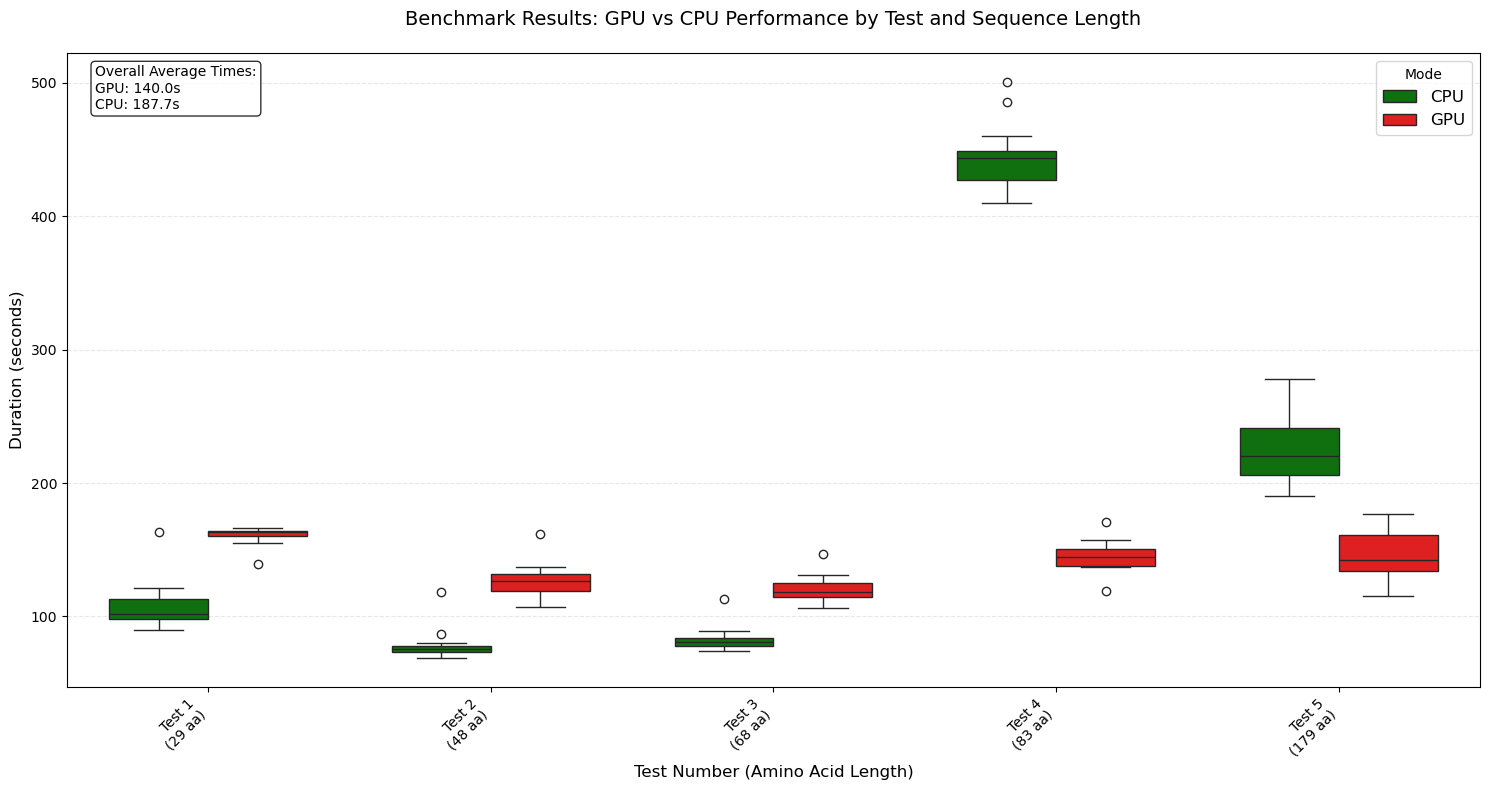

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the benchmark data
df = pd.read_csv('benchmark.csv')

# Extract test numbers and create a combined label with amino acid length
df['test_num'] = df['file'].str.extract('test(\d+)').astype(int)
df['test_label'] = df.apply(lambda x: f"Test {x['test_num']}\n({x['aa_length']} aa)", axis=1)

# Create the plot
plt.figure(figsize=(15, 8))

# Create boxplot only (removed stripplot)
sns.boxplot(data=df, x='test_label', y='duration_seconds', hue='mode',
            palette={'GPU': 'red', 'CPU': 'green'}, width=0.7)

# Customize the plot
plt.title('Benchmark Results: GPU vs CPU Performance by Test and Sequence Length', 
         fontsize=14, pad=20)
plt.xlabel('Test Number (Amino Acid Length)', fontsize=12)
plt.ylabel('Duration (seconds)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3, axis='y')
plt.legend(title='Mode', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a text box with summary statistics
gpu_avg = df[df['mode'] == 'GPU']['duration_seconds'].mean()
cpu_avg = df[df['mode'] == 'CPU']['duration_seconds'].mean()
stats_text = f'Overall Average Times:\nGPU: {gpu_avg:.1f}s\nCPU: {cpu_avg:.1f}s'
plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()